In [1]:
from functions import Datasets, import_data, description, obliczanie_wieku, przedzialy_ufnosci_srednia
from functions import boxplot, line_plot, time_plot, bar_plot, plot_hist
import pandas as pd

In [3]:
print(Datasets())

Dostępne datasety: patient, region, weather


1. Pobranie danych 

In [4]:
patient = import_data(Datasets.patient)
region = import_data(Datasets.region)
weather = import_data(Datasets.weather)
Patient_Region = pd.merge(patient, region, how='inner', on=['province', 'city'])
Patient_Weather = pd.merge(patient, weather, how='inner', left_on=['confirmed_date', 'province'], right_on=['date', 'province'])

2. Dostępne kolumny

In [11]:
print(patient.columns)
print(region.columns)
print(weather.columns)

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')
Index(['code', 'province', 'city', 'latitude', 'longitude',
       'elementary_school_count', 'kindergarten_count', 'university_count',
       'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio',
       'nursing_home_count'],
      dtype='object')
Index(['code', 'province', 'date', 'avg_temp', 'min_temp', 'max_temp',
       'precipitation', 'max_wind_speed', 'most_wind_direction',
       'avg_relative_humidity'],
      dtype='object')


3. Wyrysowanie histogramu dla wybranej kolumny - wskaż jeden DataFrame z (patient, region, weather)  
oraz numer kolumny 

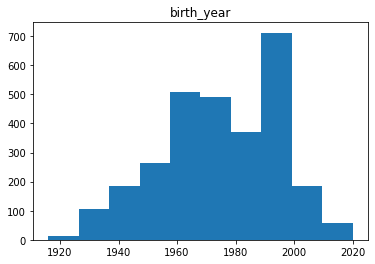

In [15]:
plot_hist(patient, column = patient.columns[3])

4. Przedstawienie podstawowych charakterystyk dla wybranej bazy - wskaż jeden DataFrame z (patient, region, weather)  

In [4]:
description(region)

,code,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32912.090164,36.396996,127.661401,74.180328,107.901639,4.151639,1.294754,20.923730,10.644672,1159.258197
std,19373.349736,1.060304,0.904781,402.713482,588.788320,22.513041,0.592898,8.087428,5.604886,6384.185085
min,10000.000000,33.488936,126.263554,4.000000,4.000000,0.000000,0.190000,7.690000,3.300000,11.000000
25%,14027.500000,35.405263,126.927663,14.750000,16.000000,0.000000,0.870000,14.117500,6.100000,111.000000
50%,30075.000000,36.386601,127.384250,22.000000,31.000000,1.000000,1.270000,18.530000,8.750000,300.000000
75%,51062.500000,37.466119,128.473953,36.250000,55.250000,3.000000,1.612500,27.262500,14.625000,694.500000
max,80000.000000,38.380571,130.905883,6087.000000,8837.000000,340.000000,4.180000,40.260000,24.700000,94865.000000


In [6]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
dfs = {
        'patient': patient,
        'region': region,
        'weather': weather}
def description(x):
    return dfs[x].describe()
interact(description, x=[('patient', 'patient'), ('region', 'region'), ('weather', 'weather')])

interactive(children=(Dropdown(description='x', options=(('patient', 'patient'), ('region', 'region'), ('weath…

<function __main__.description(x)>

5. Wyrysowanie boxplota dla wybranych kolumn - wskaż jeden DataFrame z (patient, region, weather), podaj nazwe kolumny grupujacej oraz kolumne z wartosciami

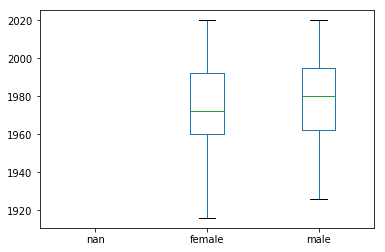

In [10]:
boxplot(patient, 'sex', 'birth_year')

6. Wyrysowanie wykresu liniowego dla wybranego przedzialu czasowego - wskaż jeden DataFrame z (patient, region, weather), podaj nazwe kolumny z wartosciami oraz nazwe kolumny z datami. Opcjonalnie wybierz przedzial czasowy podajac argumenty start i end.

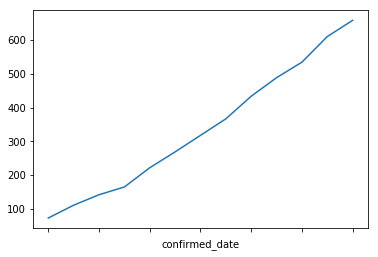

In [5]:
# Argumenty 'start', 'end' sa opcjonalne
time_plot(patient, 'patient_id', 'confirmed_date', start='2020-03-20', end='2020-04-01')

7. Wyrysowanie wykresu liniowego dla wybranych kolumn - wskaż jeden DataFrame z (patient, region, weather), podaj nazwe kolumny dla osi x, nazwe kolumny grupujacej oraz koulmy z wartosciami. Opcjonalnie podaj wartosc agregatu (domyslnie ustawiony jako count)

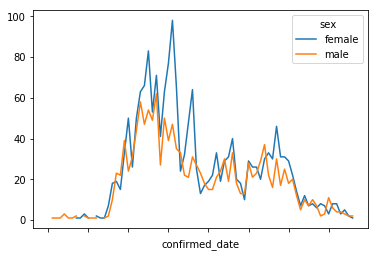

In [8]:
line_plot(patient, 'confirmed_date', 'sex', 'patient_id', 'count')

8. Wyrysowanie barplota dla wybranych kolumn - wskaż jeden DataFrame z (patient, region, weather), podaj nazwe kolumny grupujacej oraz kolumne z wartosciami. Opcjonalnie podaj wartosc agregatu (domyslnie ustawiony jako count)

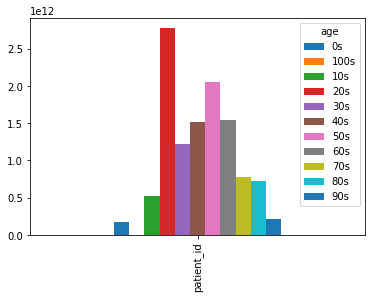

In [9]:
bar_plot(patient, 'age', 'patient_id', 'sum')

9. Obliczanie przedzialow ufnosci dla sredniej - wskaż jeden DataFrame z (patient, region, weather), podaj nazwe kolumny z wartosciami oraz poziom ufnosci

In [7]:
przedzialy_ufnosci_srednia(obliczanie_wieku(patient, 'birth_year'), 0.95)

'Srednia: 45.04326756663205. Przedzialy ufnosci: 44.30361575190735, 45.782919381356756'